Initial Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Missing Values:

survived         0
pclass        

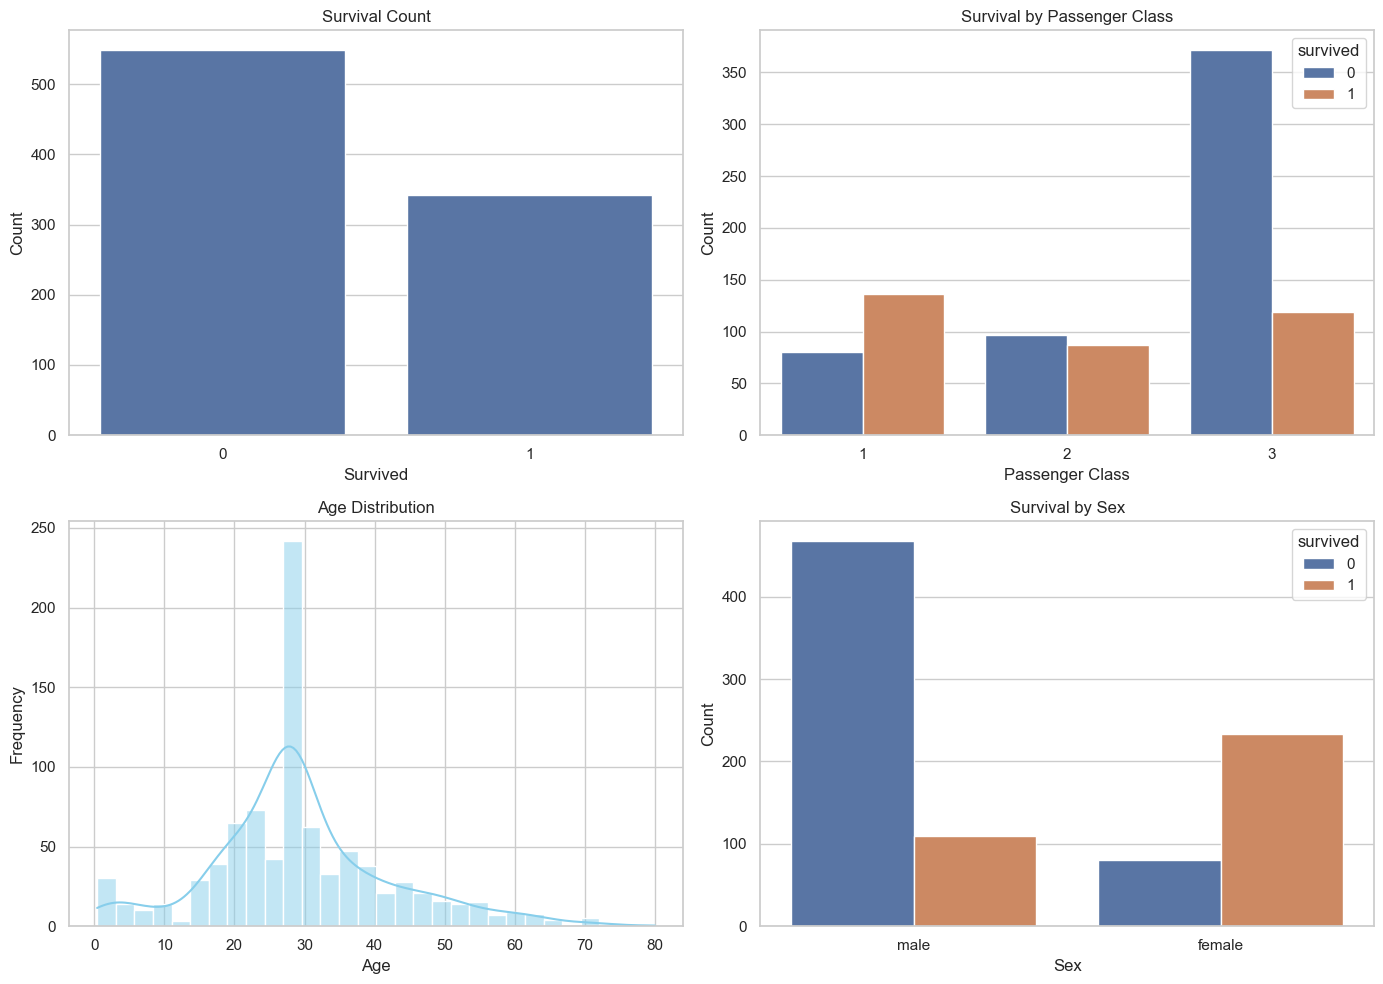

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = sns.load_dataset('titanic')

# Basic Info
print("Initial Dataset Info:\n")
print(df.info())
print("\nMissing Values:\n")
print(df.isnull().sum())
print("\nFirst 5 rows:\n")
print(df.head())

# Data Cleaning
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df.drop(columns=['deck'], inplace=True)  # too many missing values

# Verify cleaning
print("\nPost-Cleaning Missing Values:\n")
print(df.isnull().sum())

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Survival Count
sns.countplot(x='survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count')
axes[0, 0].set_xlabel('Survived')
axes[0, 0].set_ylabel('Count')

# Plot 2: Survival by Passenger Class
sns.countplot(x='pclass', hue='survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Passenger Class')
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_ylabel('Count')

# Plot 3: Age Distribution
sns.histplot(df['age'], bins=30, kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')

# Plot 4: Survival by Sex
sns.countplot(x='sex', hue='survived', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Survival by Sex')
axes[1, 1].set_xlabel('Sex')
axes[1, 1].set_ylabel('Count')

# Layout adjustment
plt.tight_layout()
plt.show()
